# Seaborn

## Distribution Plots

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

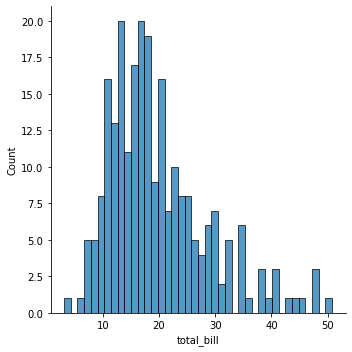

In [5]:
sns.displot(tips['total_bill'],kde=False,bins=40)

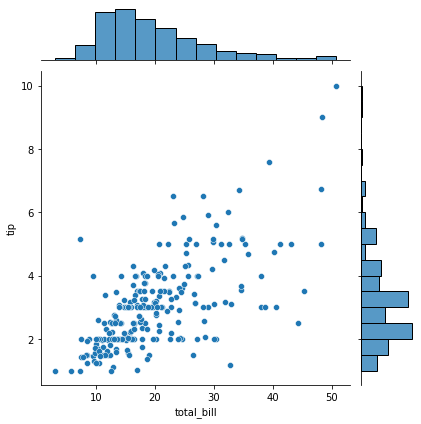

In [6]:
sns.jointplot(x='total_bill' , y='tip', data=tips)

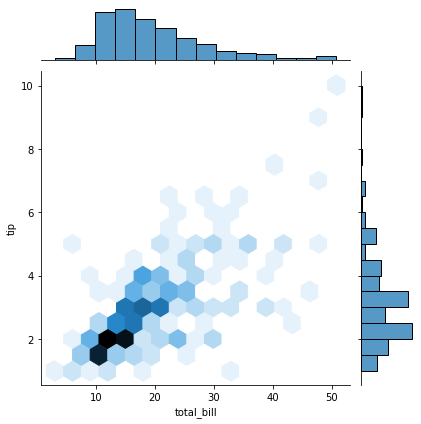

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

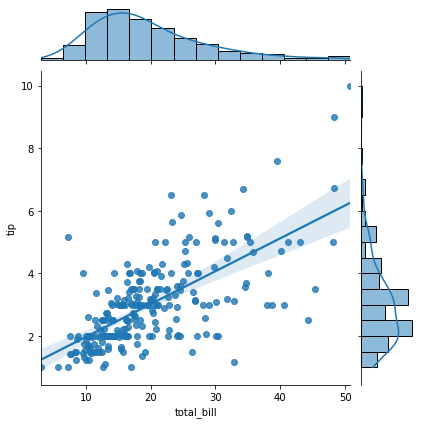

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

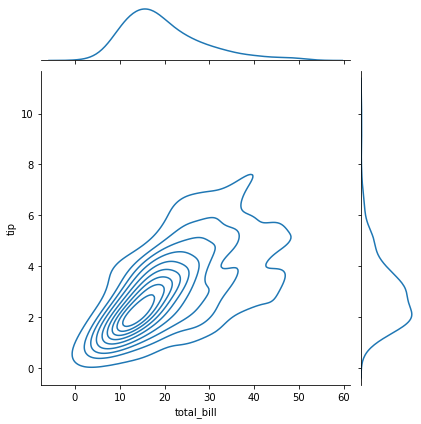

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

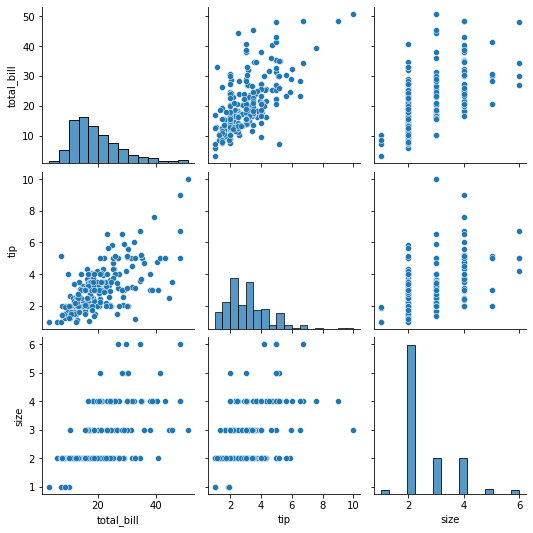

In [10]:
sns.pairplot(tips)

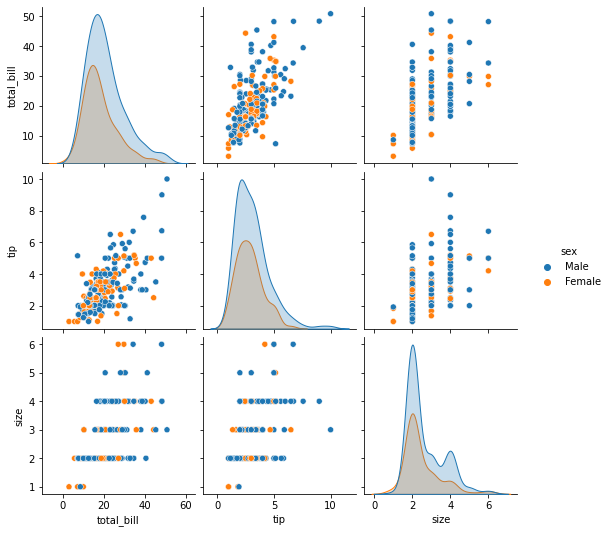

In [11]:
sns.pairplot(tips,hue='sex')

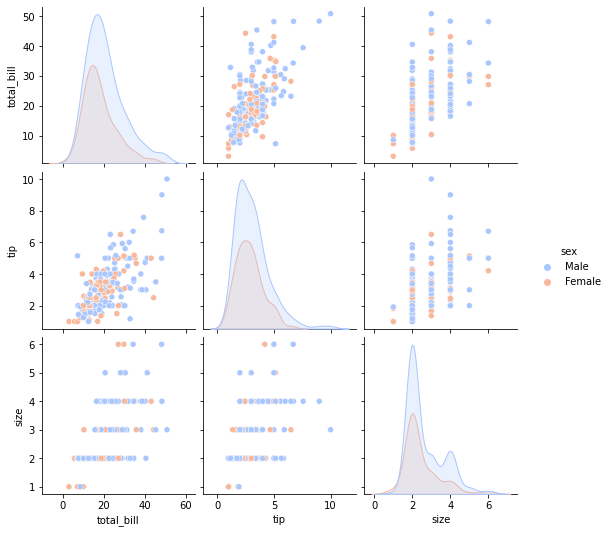

In [12]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

<AxesSubplot:xlabel='total_bill'>

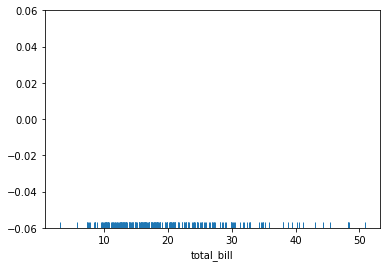

In [13]:
sns.rugplot(tips['total_bill'])

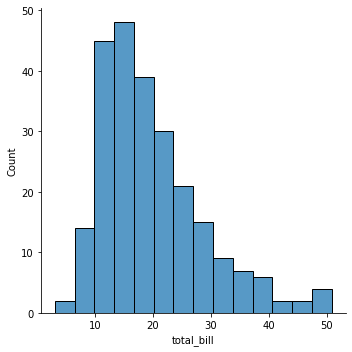

In [14]:
sns.displot(tips['total_bill'])

(0.0, 1.0)

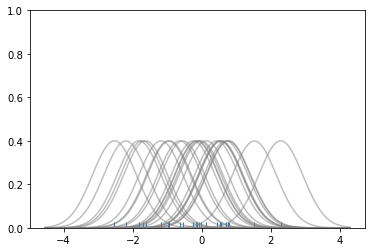

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats

# create dataset
dataset = np.random.randn(25)

# create another rugplot
sns.rugplot(dataset);

#set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_desity_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# create an empty kernel list
kernel_list = []

# plot each basis function
for data_point in dataset:
    # create a kernel for each point and append to list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)

    #scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color='grey',alpha=.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

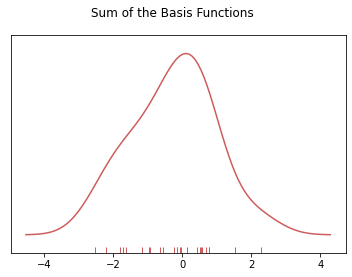

In [16]:
# To get the kde (kernel density estimation) plot we can sum these basis functions.

# plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

#plot figure
fig = plt.plot(x_axis, sum_of_kde,color='indianred')

# add the initial rugplot
sns.rugplot(dataset,c='indianred')

# get rid of y-tick marks
plt.yticks([])

# set title
plt.suptitle('Sum of the Basis Functions')

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

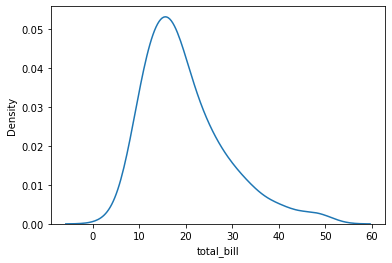

In [17]:
sns.kdeplot(tips['total_bill'])

## Categorical Plot

In [18]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

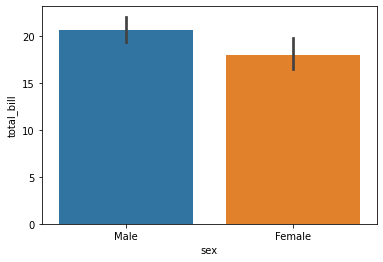

In [19]:
sns.barplot(x='sex', y='total_bill' , data=tips)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

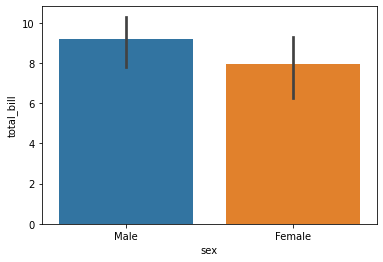

In [20]:
import numpy as np
sns.barplot(x='sex', y='total_bill' , data=tips, estimator=np.std)

<AxesSubplot:xlabel='sex', ylabel='count'>

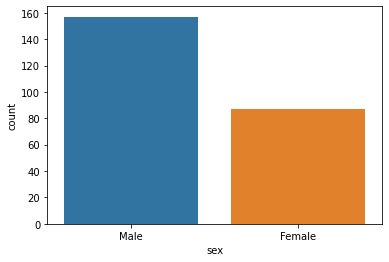

In [21]:
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

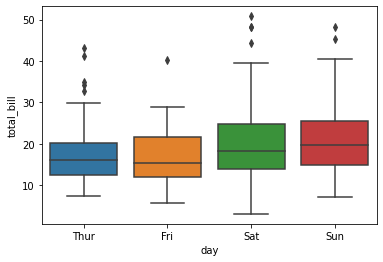

In [22]:
sns.boxplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

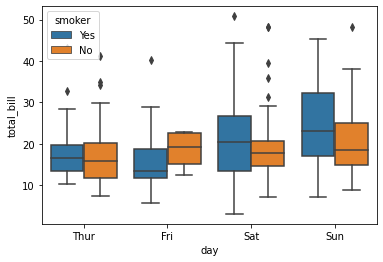

In [23]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

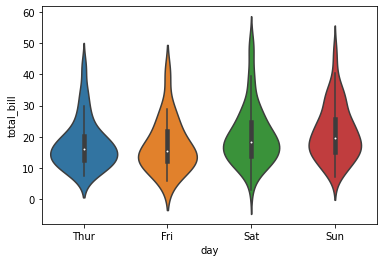

In [24]:
sns.violinplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

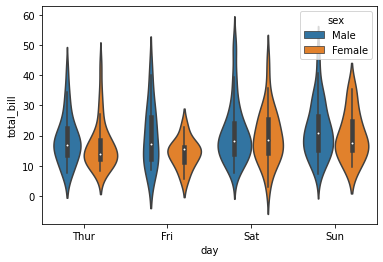

In [25]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

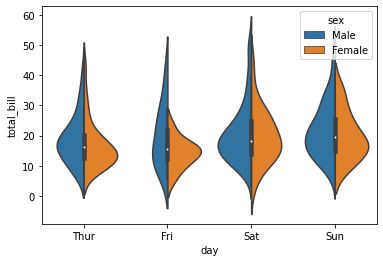

In [26]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

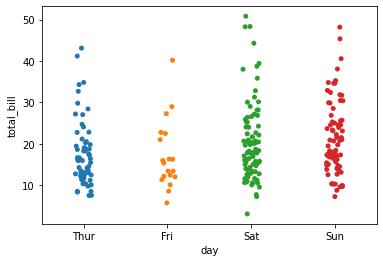

In [27]:
sns.stripplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

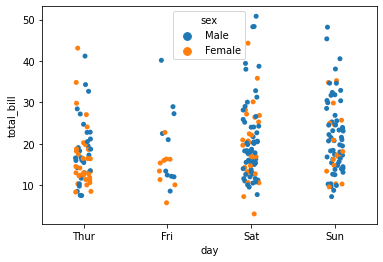

In [28]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

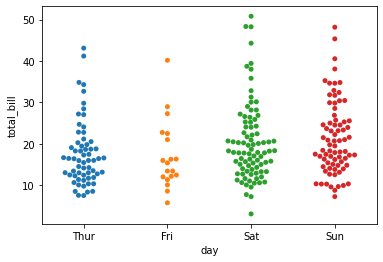

In [29]:
sns.swarmplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

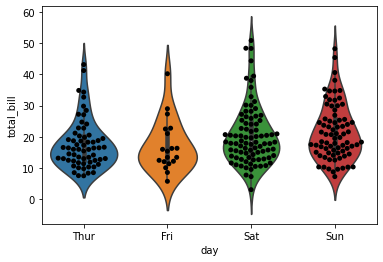

In [30]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

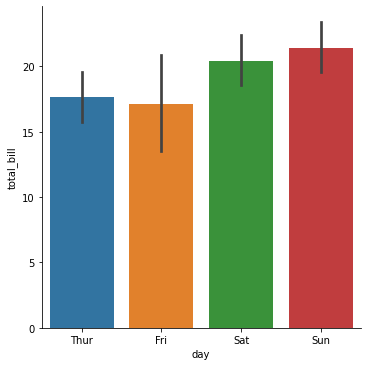

In [31]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

## Matrix Plots

In [32]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [33]:
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [34]:
tips.corr()

total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

<AxesSubplot:>

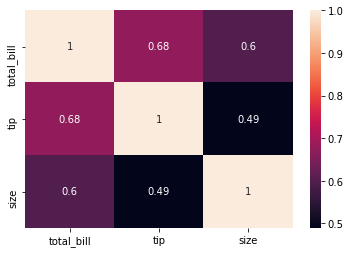

In [35]:
tc = tips.corr()
sns.heatmap(tc,annot=True)

<AxesSubplot:>

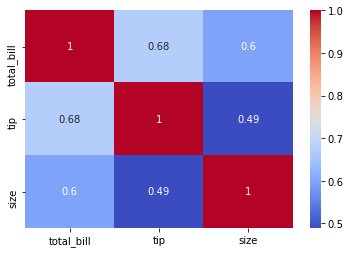

In [36]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [37]:
flights.pivot_table(index='month',columns='year',values='passengers')

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   310   362   390
Dec     118   140   166   194   201   229   278   306   336   337   405   432

In [38]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

<AxesSubplot:xlabel='year', ylabel='month'>

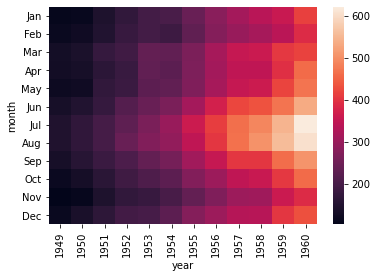

In [39]:
sns.heatmap(fp)

<AxesSubplot:xlabel='year', ylabel='month'>

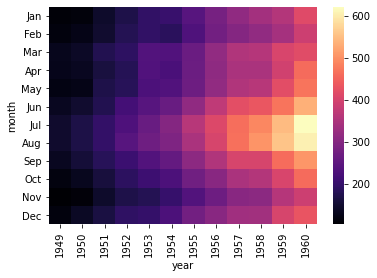

In [40]:
sns.heatmap(fp,cmap='magma')

<AxesSubplot:xlabel='year', ylabel='month'>

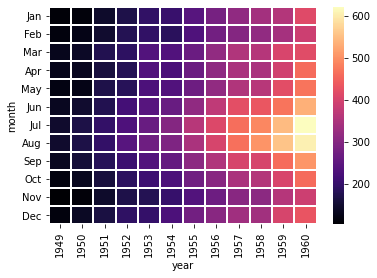

In [41]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=1)

<AxesSubplot:xlabel='year', ylabel='month'>

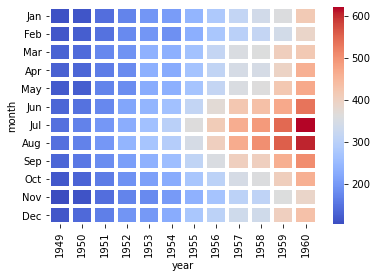

In [42]:
sns.heatmap(fp,cmap='coolwarm',linecolor='white',linewidths=3)

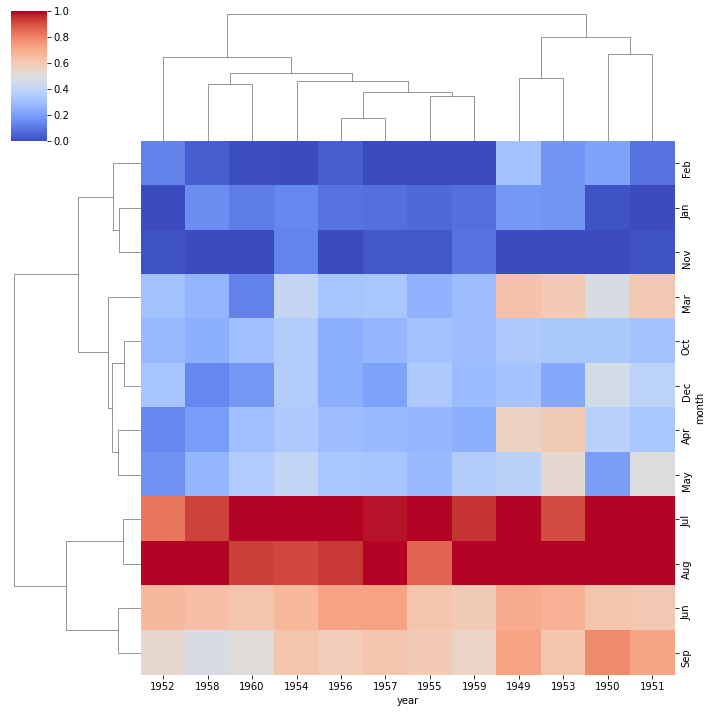

In [43]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

In [44]:
import seaborn as sns
%matplotlib inline
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [45]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

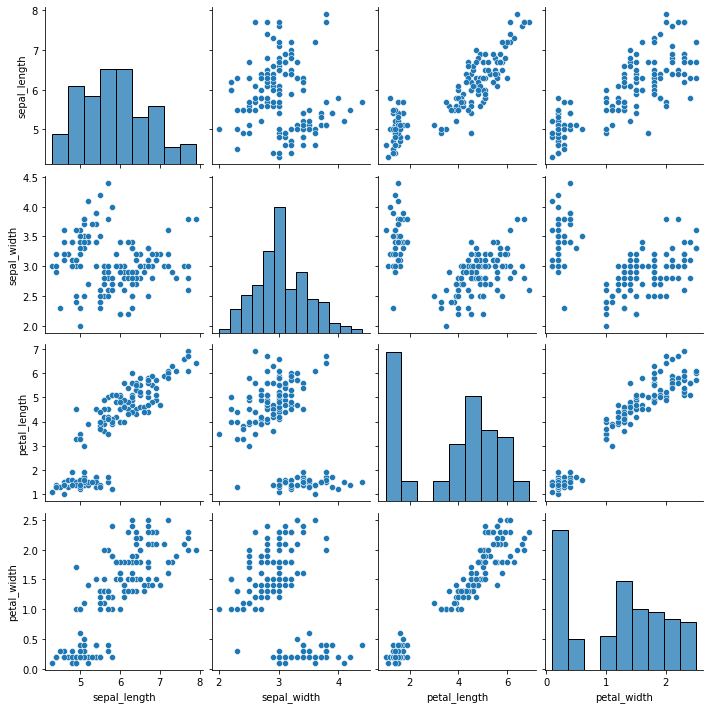

In [46]:
sns.pairplot(iris)

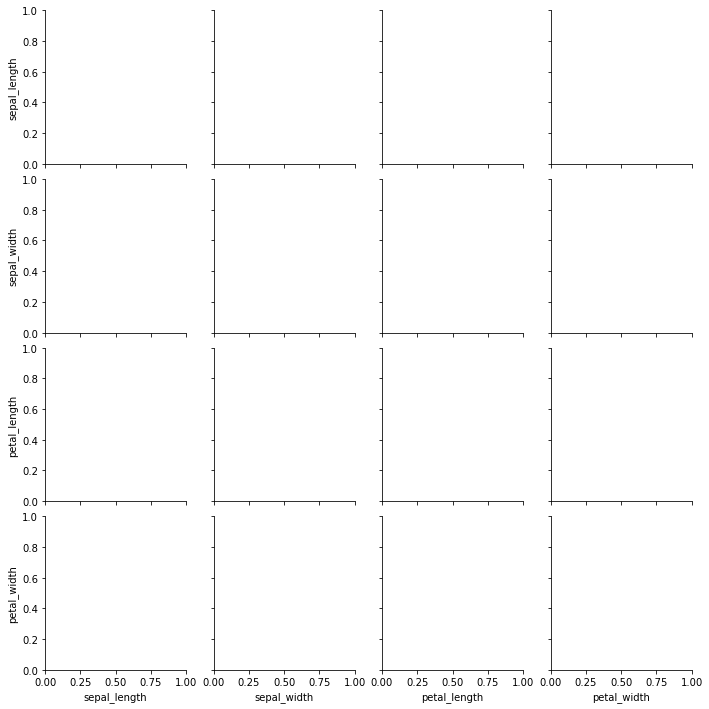

In [47]:
sns.PairGrid(iris)

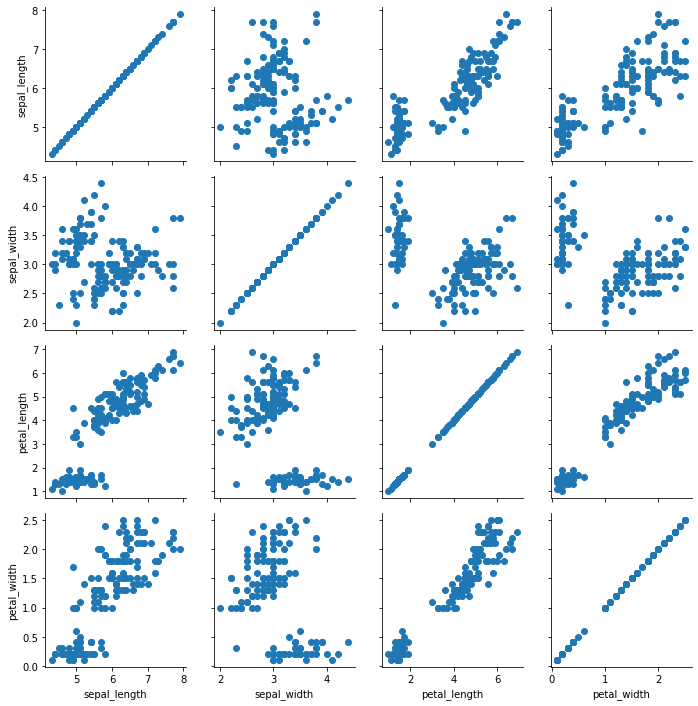

In [48]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

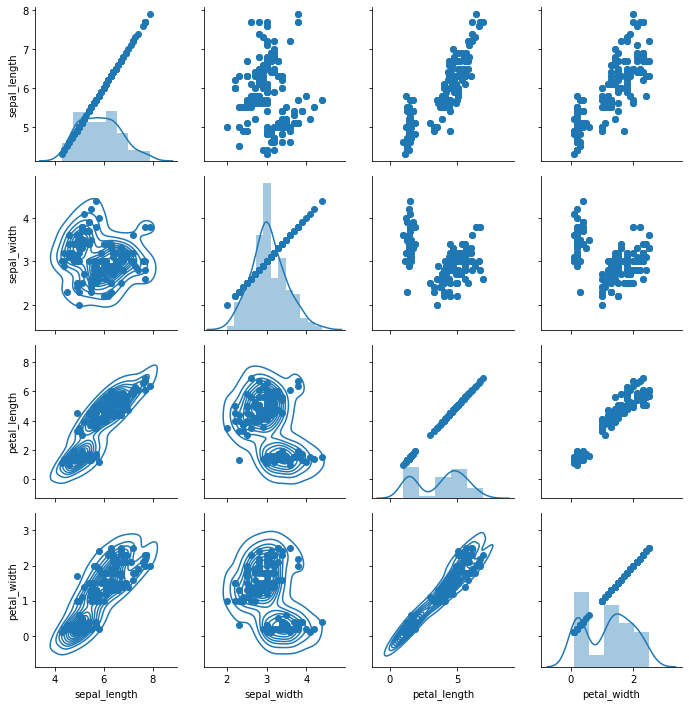

In [49]:
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [50]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

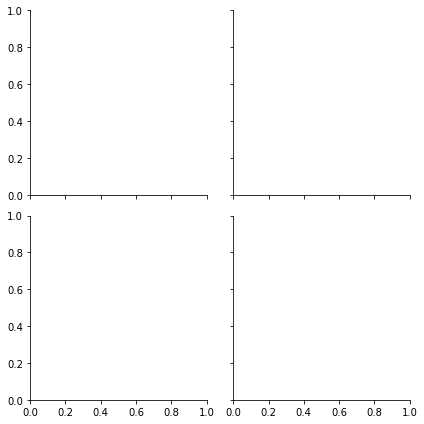

In [52]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')

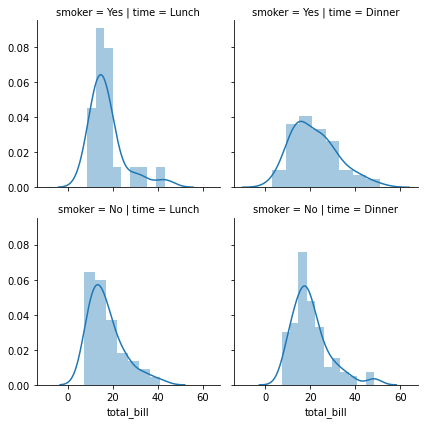

In [54]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')

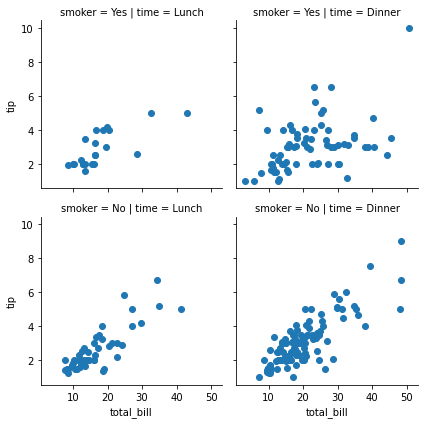

In [55]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')

## Regression Plots

In [56]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

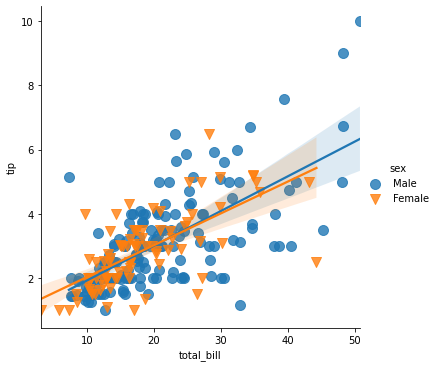

In [60]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
            scatter_kws={'s':100})

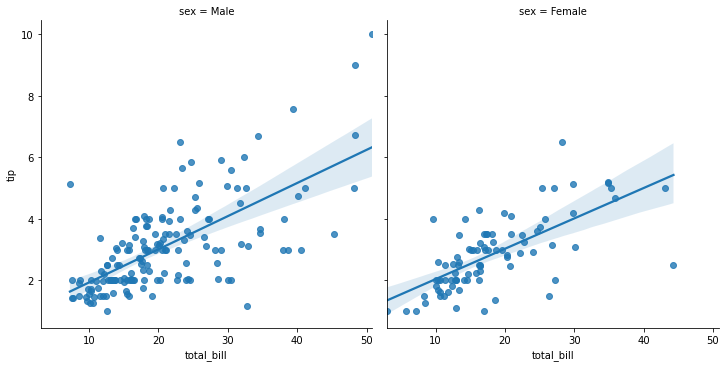

In [61]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

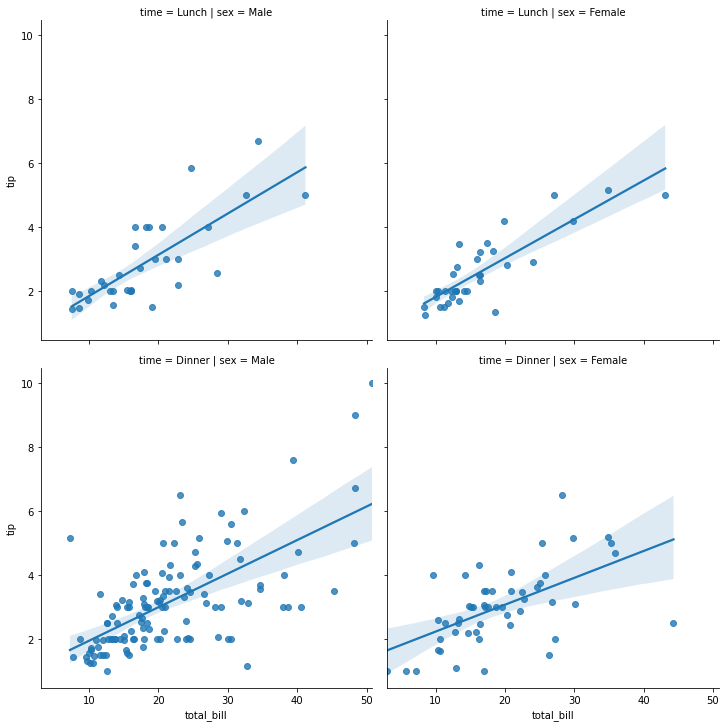

In [62]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time')

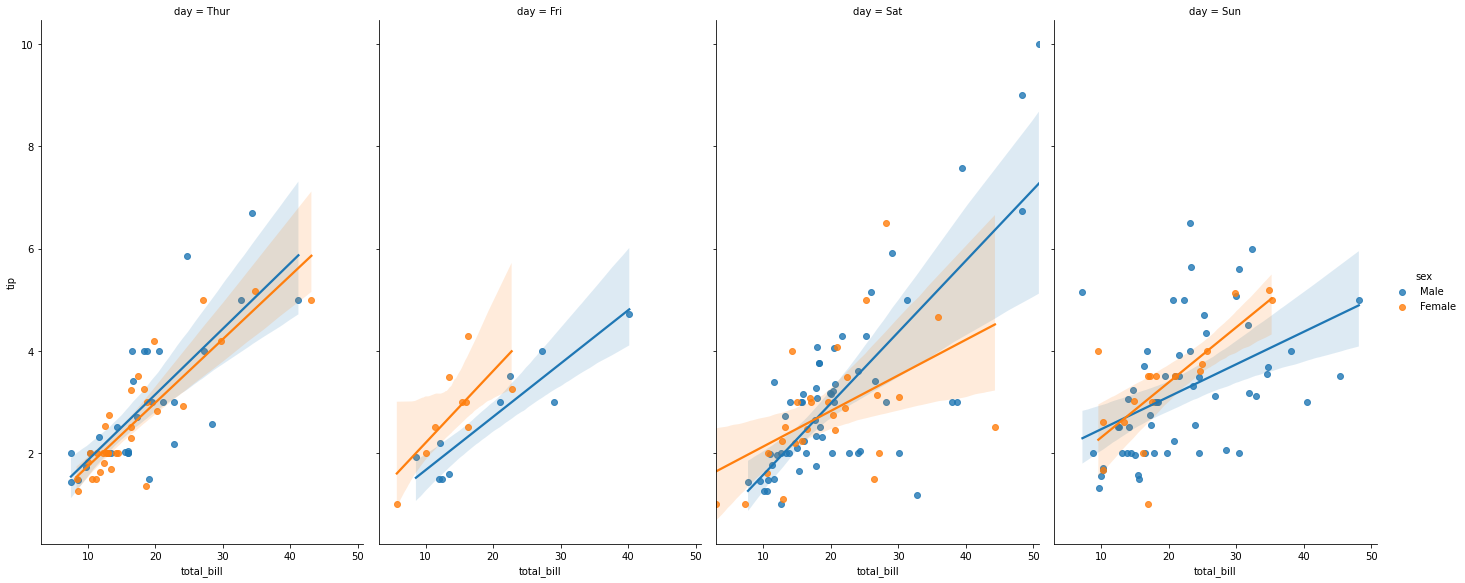

In [64]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',
            aspect=0.6,size=8)

## Style and Color

In [65]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<AxesSubplot:xlabel='sex', ylabel='count'>

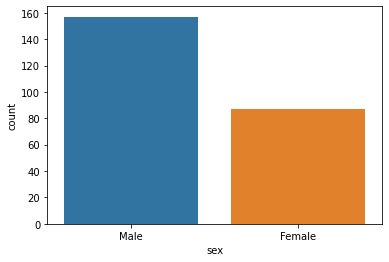

In [66]:
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

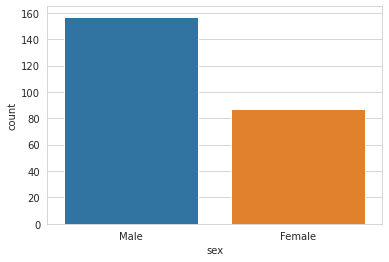

In [67]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)

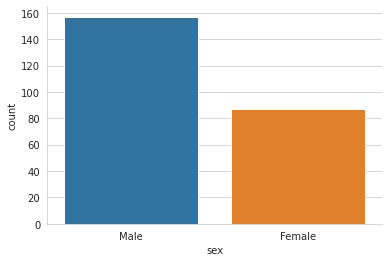

In [68]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)
sns.despine()

<AxesSubplot:xlabel='sex', ylabel='count'>

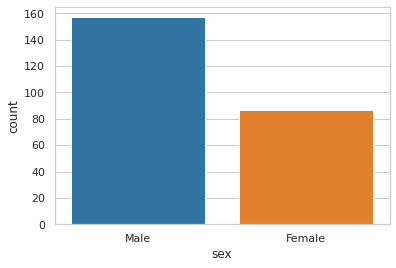

In [71]:
sns.set_context('notebook')
sns.countplot(x='sex',data=tips)

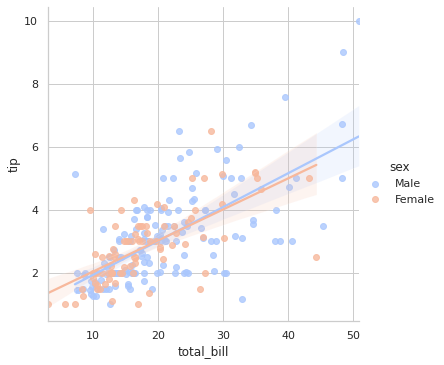

In [72]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')